# 机器学习和工具练习介绍

## 介绍
我们将使用本教程的IRIS数据集。这是一个著名的数据集包含虹膜物种和萼片和花瓣测量。我们将使用的数据是在data目录中找到的名为IrsixDATA.CSV的文件中。

## pandas Series
### 创建一个集合

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
step_data = [121, 7891, 9761, 3907, 4338, 5373]
step_counts = pd.Series(step_data,name = 'test')
print(step_counts)

0     121
1    7891
2    9761
3    3907
4    4338
5    5373
Name: test, dtype: int64


 ### 修改集合下标
 修改集合下标为时间，可见index 0- 5 变成了时间.
应该属于键值对类型的集合。等同于修改了集合的建值

In [24]:
step_counts.index = pd.date_range('20180628', periods = 6)
print(step_counts)

2018-06-28     121
2018-06-29    7891
2018-06-30    9761
2018-07-01    3907
2018-07-02    4338
2018-07-03    5373
Freq: D, Name: test, dtype: int64


### 取值

In [25]:
print(step_counts['2018-06-28'])
print(step_counts[0])

121
121


似乎比我了解的键值对更加强大，还可以这样用。

In [26]:
print(step_counts['2018-06'])

2018-06-28     121
2018-06-29    7891
2018-06-30    9761
Freq: D, Name: test, dtype: int64


### 修改数据类型 astype

In [27]:
print(step_counts.dtypes)
step_counts = step_counts.astype(np.float)
print(step_counts.dtypes)
                                 

int64
float64


### 统一赋值为NaN

In [28]:
step_counts[1:3] = np.NaN
print(step_counts)


2018-06-28     121.0
2018-06-29       NaN
2018-06-30       NaN
2018-07-01    3907.0
2018-07-02    4338.0
2018-07-03    5373.0
Freq: D, Name: test, dtype: float64


### 把NaN值修改为0  fillna

In [29]:
step_counts = step_counts.fillna(0.) 
print(step_counts)

2018-06-28     121.0
2018-06-29       0.0
2018-06-30       0.0
2018-07-01    3907.0
2018-07-02    4338.0
2018-07-03    5373.0
Freq: D, Name: test, dtype: float64


### 创建 DataFrame
二维的数组，也可以理解为表格

In [30]:
cycling_data = [10.7, 0, None, 2.4, 15.3, 10.9, 0, None]
joined_data = list(zip(step_data, cycling_data))
activity_df = pd.DataFrame(joined_data)
print(activity_df)


      0     1
0   121  10.7
1  7891   0.0
2  9761   NaN
3  3907   2.4
4  4338  15.3
5  5373  10.9


### 修改DataFrame 的行列值
可以理解为修改二维数组的横坐标与纵坐标。

In [31]:
activity_df = pd.DataFrame(joined_data, index=pd.date_range('20180628', periods=6), columns=['Walking','Cycling'])
print(activity_df)


            Walking  Cycling
2018-06-28      121     10.7
2018-06-29     7891      0.0
2018-06-30     9761      NaN
2018-07-01     3907      2.4
2018-07-02     4338     15.3
2018-07-03     5373     10.9


取值有所变化

In [32]:
print(activity_df.loc['2018-06-28'])
print(activity_df.iloc[0])


Walking    121.0
Cycling     10.7
Name: 2018-06-28 00:00:00, dtype: float64
Walking    121.0
Cycling     10.7
Name: 2018-06-28 00:00:00, dtype: float64


In [33]:
print(activity_df['Walking'])
print(activity_df.Walking)
print(activity_df.iloc[:,0])
print(activity_df.iloc[1,0])


2018-06-28     121
2018-06-29    7891
2018-06-30    9761
2018-07-01    3907
2018-07-02    4338
2018-07-03    5373
Freq: D, Name: Walking, dtype: int64
2018-06-28     121
2018-06-29    7891
2018-06-30    9761
2018-07-01    3907
2018-07-02    4338
2018-07-03    5373
Freq: D, Name: Walking, dtype: int64
2018-06-28     121
2018-06-29    7891
2018-06-30    9761
2018-07-01    3907
2018-07-02    4338
2018-07-03    5373
Freq: D, Name: Walking, dtype: int64
7891


### 读取csv文件

In [34]:
filepath = 'data/Iris_Data.csv'
data = pd.read_csv(filepath)
print(data.iloc[:5])


   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [35]:
data['sepal_area'] = data.sepal_length *data.sepal_width
print(data.iloc[:5, -4:])


   petal_length  petal_width      species  sepal_area
0           1.4          0.2  Iris-setosa       17.85
1           1.4          0.2  Iris-setosa       14.70
2           1.3          0.2  Iris-setosa       15.04
3           1.5          0.2  Iris-setosa       14.26
4           1.4          0.2  Iris-setosa       18.00


### lambda表达式
还可以这样操作，使用lambda表达式

In [36]:
data['abbrev'] = data .species .apply(lambda x:x.replace('Iris-',''))
print(data.iloc[:5, -3:])


       species  sepal_area  abbrev
0  Iris-setosa       17.85  setosa
1  Iris-setosa       14.70  setosa
2  Iris-setosa       15.04  setosa
3  Iris-setosa       14.26  setosa
4  Iris-setosa       18.00  setosa


### concat 合并表，矩阵合并

In [54]:
# print(data.iloc[:2])
# print(data.iloc[-2:])
small_data = pd.concat([data.iloc[:2], data.iloc[-2:]])
print(small_data.iloc[:,:4])

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8


### groupby 分组

In [38]:
group_sizes = (data .groupby('species') .size())
print(group_sizes)


species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


### 平均数 mean

In [39]:
print(data.mean())
print(data.sepal_length.mean())

sepal_length     5.843333
sepal_width      3.054000
petal_length     3.758667
petal_width      1.198667
sepal_area      17.806533
dtype: float64
5.843333333333334


### 中间值 median

In [43]:
print(data.petal_length.median())


4.35


### 众数
出现频率最多的数值

In [42]:
print(small_data.petal_length.mode())

0    1.4
dtype: float64


### 标准差、方差、SEM、分位数
标准差 std
方差 var
SEM 
分位数 quantile

In [45]:
print(data.petal_length.std(),       data.petal_length.var(),     data.petal_length.sem())

print(data.quantile(0))



1.7644204199522626 3.113179418344519 0.1440643240210085
sepal_length     4.3
sepal_width      2.0
petal_length     1.0
petal_width      0.1
sepal_area      10.0
Name: 0, dtype: float64


In [46]:
print(data.describe())


       sepal_length  sepal_width  petal_length  petal_width  sepal_area
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.054000      3.758667     1.198667   17.806533
std        0.828066     0.433594      1.764420     0.763161    3.368693
min        4.300000     2.000000      1.000000     0.100000   10.000000
25%        5.100000     2.800000      1.600000     0.300000   15.645000
50%        5.800000     3.000000      4.350000     1.300000   17.660000
75%        6.400000     3.300000      5.100000     1.800000   20.325000
max        7.900000     4.400000      6.900000     2.500000   30.020000


### 样本sample

In [86]:
sample = (data .sample(n=8, replace=False, random_state=12))
print(sample.iloc[:,:4])


     sepal_length  sepal_width  petal_length  petal_width
40            5.0          3.5           1.3          0.3
146           6.3          2.5           5.0          1.9
38            4.4          3.0           1.3          0.2
99            5.7          2.8           4.1          1.3
143           6.8          3.2           5.9          2.3
116           6.5          3.0           5.5          1.8
148           6.2          3.4           5.4          2.3
39            5.1          3.4           1.5          0.2


## Matplotlib 

### 散点图

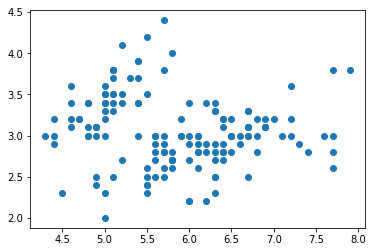

In [77]:

plt.plot(data.sepal_length, data.sepal_width, ls ='', marker='o', label='sepal')


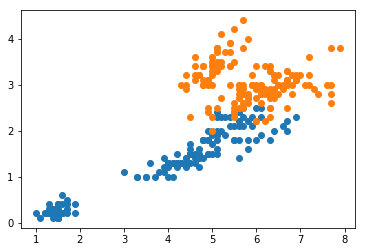

In [78]:
plt.plot(data.petal_length, data.petal_width,ls='',  marker='o', label='petal')
plt.plot(data.sepal_length, data.sepal_width, ls ='', marker='o', label='sepal')

### 柱状图

(array([ 4.,  1.,  6.,  5., 16.,  9.,  5.,  6.,  7., 14.,  7.,  9.,  6.,
        13.,  7.,  7.,  8.,  3.,  5.,  1.,  4.,  1.,  1.,  4.,  1.]),
 array([4.3  , 4.444, 4.588, 4.732, 4.876, 5.02 , 5.164, 5.308, 5.452,
        5.596, 5.74 , 5.884, 6.028, 6.172, 6.316, 6.46 , 6.604, 6.748,
        6.892, 7.036, 7.18 , 7.324, 7.468, 7.612, 7.756, 7.9  ]),
 <a list of 25 Patch objects>)

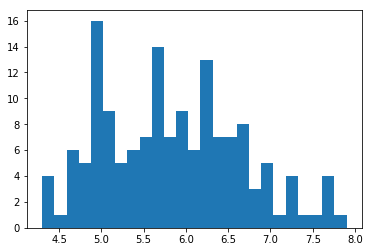

In [67]:
plt.hist(data.sepal_length, bins=25)


[Text(0,0.5,'ylabel'), Text(0.5,0,'xlabel'), Text(0.5,1,'Title')]

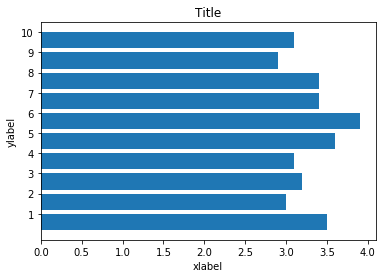

In [82]:
fig, ax = plt.subplots()
ax.barh(np.arange(10), data.sepal_width.iloc[:10])
# 设置坐标和表头
ax.set_yticks(np.arange(0.4,10.4,1.0)) 
ax.set_yticklabels(np.arange(1,11)) 
ax.set(xlabel='xlabel', ylabel='ylabel', title='Title')

In [97]:
data.groupby('species').mean().plot(color=['red','blue', 'black','green'], fontsize=10.0, figsize=(4,4))


sepal_length  sepal_width  petal_length  petal_width  \
species                                                                 
Iris-setosa             5.006        3.418         1.464        0.244   
Iris-versicolor         5.936        2.770         4.260        1.326   
Iris-virginica          6.588        2.974         5.552        2.026   

                 sepal_area  
species                      
Iris-setosa         17.2088  
Iris-versicolor     16.5262  
Iris-virginica      19.6846

## seaborn

In [90]:
import seaborn as sns
sns.jointplot(x='sepal_length', y='sepal_width', data=data, size=4)


c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


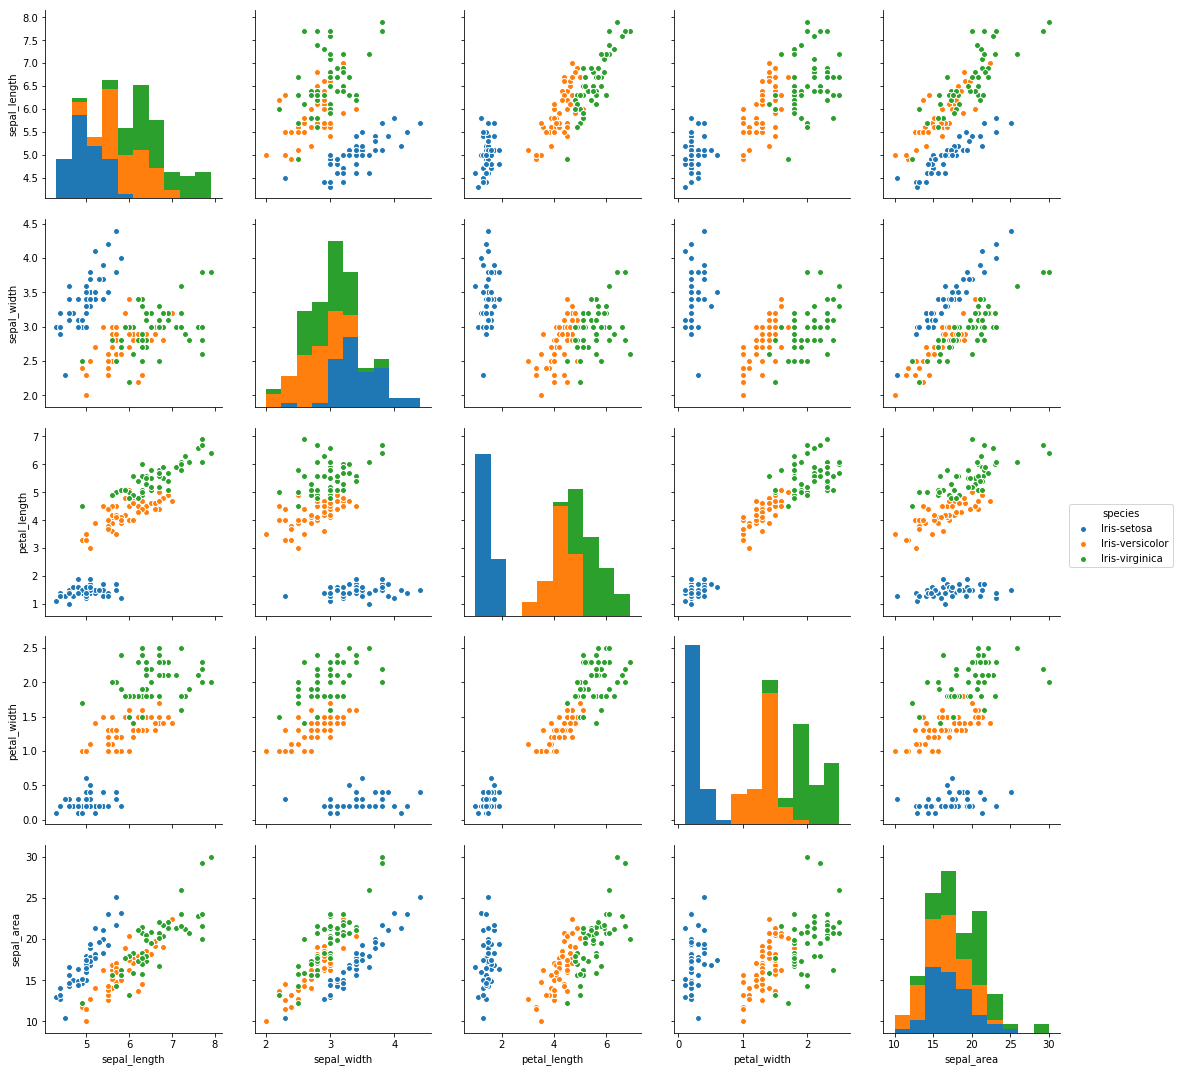

In [91]:
sns.pairplot(data, hue='species', size=3)
